# Mean, medium and price per meter for properties in Flanders
 The data is loaded from a CSV file named "property_data.csv". The analysis includes data cleaning, processing, aggregation, and visualization.
## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Clean the Data
Next, we load the data from a CSV file into a pandas DataFrame. We remove any duplicate rows and trim leading and trailing spaces from all columns. Additionally, we fill missing values with appropriate replacement values: we fill NaNs with 0 for float64 and int64 columns, and with the string 'unknown' for object (string) columns.

In [4]:
df = pd.read_csv("../data/property_data.csv")
df = df.drop_duplicates()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.loc[:, df.dtypes == np.float64] = df.loc[:, df.dtypes == np.float64].fillna(0)
df.loc[:, df.dtypes == np.int64] = df.loc[:, df.dtypes == np.int64].fillna(0)
df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('unknown')


## Data Processing
We first define a function to map postal codes to corresponding regions based on defined ranges

In [5]:
def get_region(zip_code):
    if 1000 <= zip_code <= 1299:
        return 'Brussels-Capital'
    elif (1500 <= zip_code <= 1999) or (3000 <= zip_code <= 3499):
        return 'Flemish Brabant'
    elif 2000 <= zip_code <= 2999:
        return 'Antwerp'
    elif 3500 <= zip_code <= 3999:
        return 'Limburg'
    elif 8000 <= zip_code <= 8999:
        return 'West Flanders'
    elif 9000 <= zip_code <= 9999:
        return 'East Flanders'
    else:
        return 'Unknown'


Afterwards, we convert the 'Zip code' column to integer type and create a new 'Region' column using this function. Following that, we convert the 'Price of property in euro' and 'Zip code' columns to numeric type and handle any conversion errors by setting them to NaN. We then drop any rows with NaN values in these columns and also remove rows with 'Unknown' Region.

In [6]:
df['Zip code'] = df['Zip code'].astype(int)
df['Region'] = df['Zip code'].apply(get_region)
df['Price of property in euro'] = pd.to_numeric(df['Price of property in euro'], errors='coerce')
df['Zip code'] = pd.to_numeric(df['Zip code'], errors='coerce')
df = df.dropna(subset=['Price of property in euro', 'Zip code'])
df = df[df.Region != 'Unknown']


## Data Aggregation
We calculate the average property price for each type of property in each region.

In [7]:
avg_prices = df.groupby(['Region', 'Type of property'])['Price of property in euro'].mean().reset_index()

Before visualizing, we determine the order of regions for our visualization based on the overall average property prices.

In [8]:
order = avg_prices.groupby('Region')['Price of property in euro'].mean().sort_values(ascending=False).index

## Data Visualization: Average price (mean)
Finally, we visualize our results. We create a bar plot showing the average property prices by region and property type. We rotate the x-axis labels for better readability and add a title and labels to the plot. The biggest average apartment price has regio West Flanders. The biggest average house price has has regio Brussel Capital.

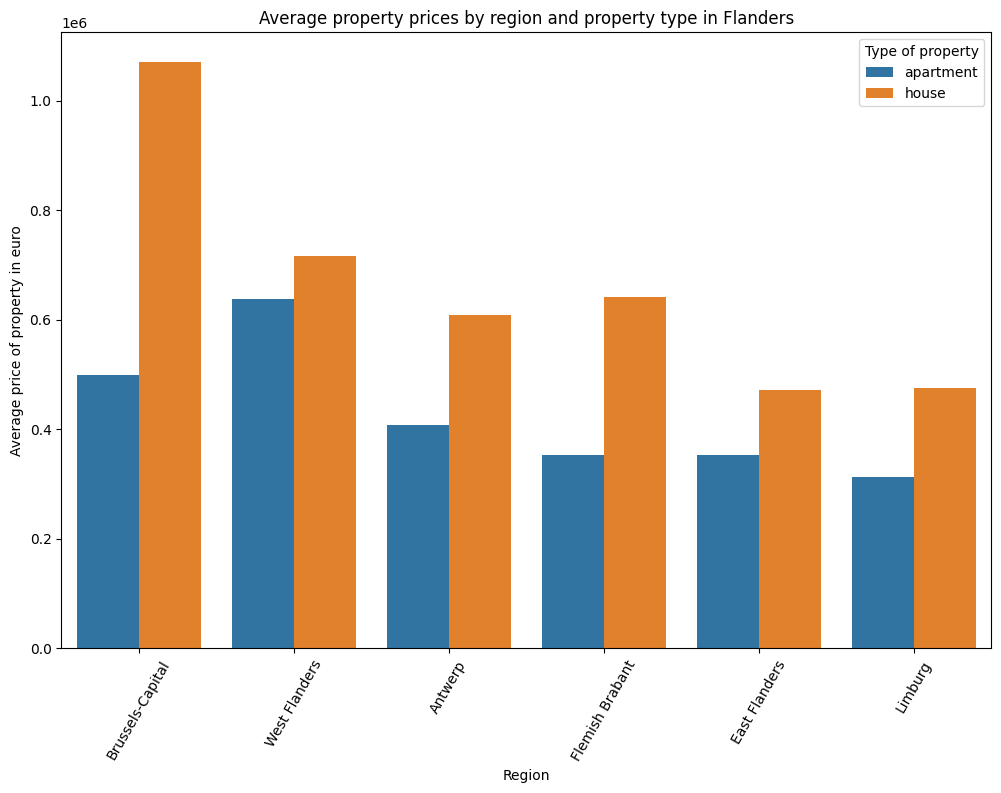

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_prices, x='Region', y='Price of property in euro', hue='Type of property', order=order)
plt.xticks(rotation=60)
plt.title('Average property prices by region and property type in Flanders')
plt.ylabel('Average price of property in euro')
plt.xlabel('Region')
plt.legend(title='Type of property')
plt.show()


## Data Visualization: Median Prices (median)
Again, we visualize our results. This time we're creating a bar plot showing the median property prices by region and property type. As before, we rotate the x-axis labels for better readability and add a title and labels to the plot. The biggest median apartment price has regio Brussel Capital. The biggest median house price has has regio Brussel Capital.

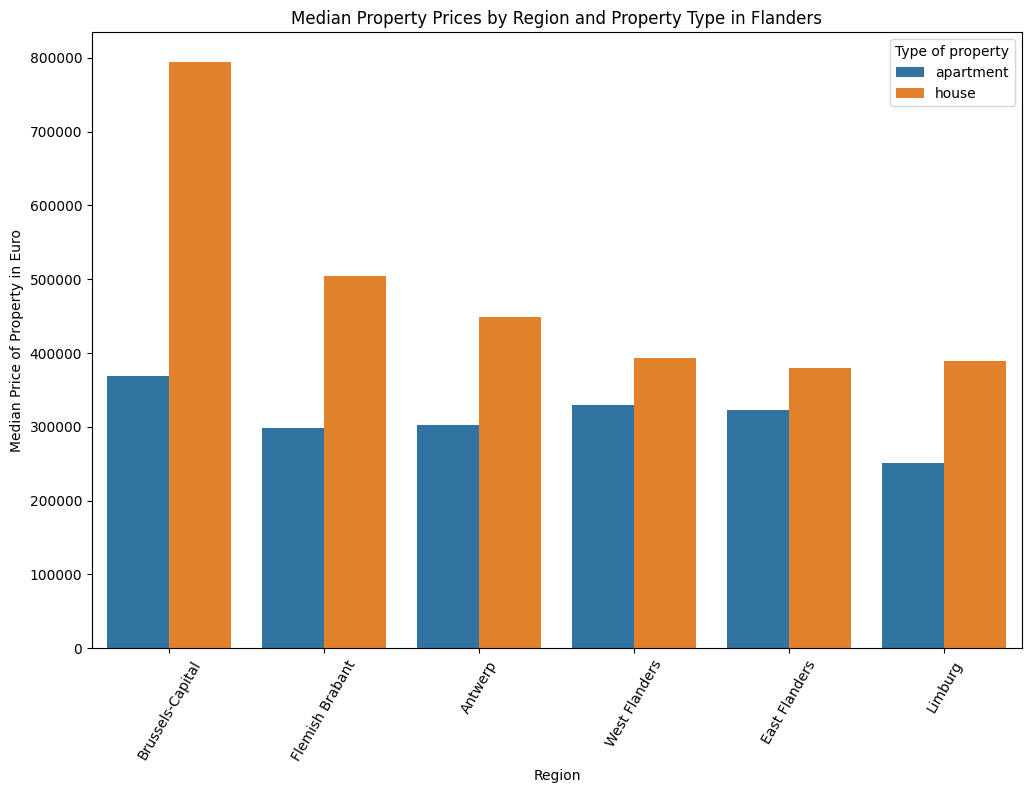

In [10]:
median_prices = df.groupby(['Region', 'Type of property'])['Price of property in euro'].median().reset_index()

order = median_prices.groupby('Region')['Price of property in euro'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.barplot(data=median_prices, x='Region', y='Price of property in euro', hue='Type of property', order=order)
plt.xticks(rotation=60)
plt.title('Median Property Prices by Region and Property Type in Flanders')
plt.ylabel('Median Price of Property in Euro')
plt.xlabel('Region')
plt.legend(title='Type of property')
plt.show()


## Data Visualization: Price per Square Meter
We create a strip plot which shows the distribution of property prices per square meter for each region and property type. A strip plot is similar to a scatter plot, but is used when one of the variables (in our case, 'Region') is categorical.  The biigest price per sqr meter has West Flanders.


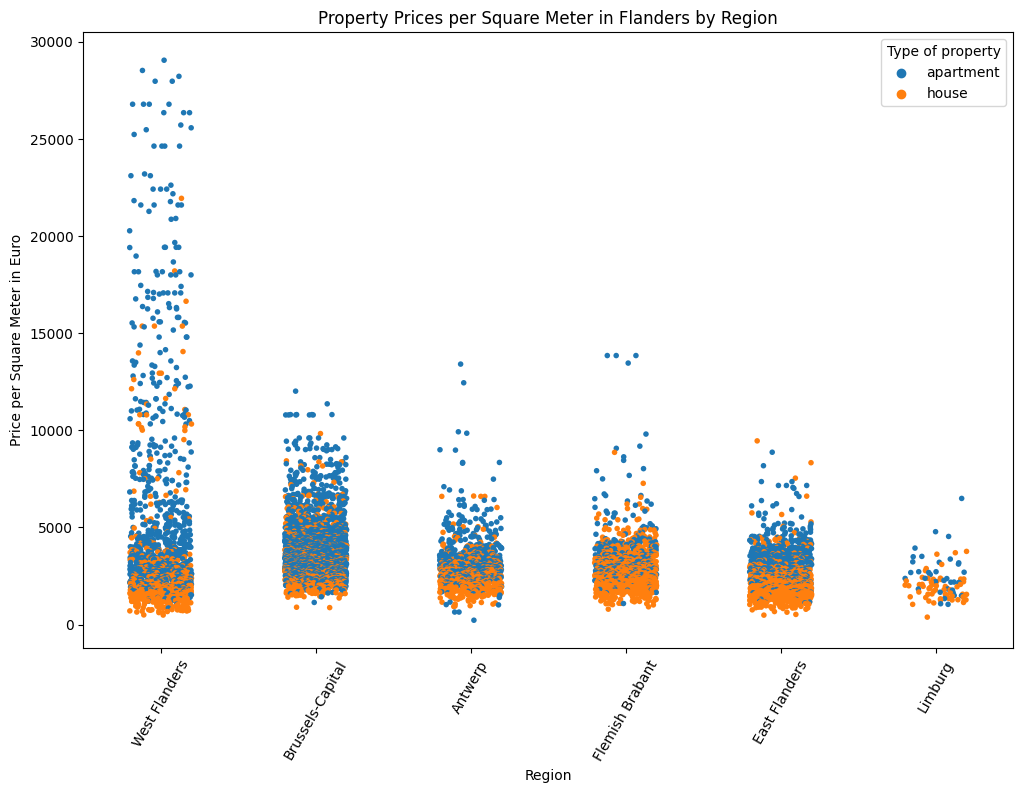

In [11]:
# Calculate price per square meter
df['Living area'] = pd.to_numeric(df['Living area'], errors='coerce')  # ensure the 'Living area' column is numeric
df['Price per square meter'] = df['Price of property in euro'] / df['Living area']

# Sort the dataframe by 'Price per square meter' column in descending order
df = df.sort_values('Price per square meter', ascending=False)

# Create a strip plot
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Region', y='Price per square meter', hue='Type of property', jitter=0.2, size=4)

plt.xticks(rotation=60)  # Rotate x labels for readability
plt.title('Property Prices per Square Meter in Flanders by Region')
plt.ylabel('Price per Square Meter in Euro')
plt.xlabel('Region')

# Add legend
plt.legend(title='Type of property')

plt.show()